In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("preprocessed_house_rent.csv")

In [3]:
dataset

,BHK,Rent,Size,Area Type,Furnishing Status,Tenant Preferred,Bathroom,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Floor Number,Total Floors
0,-0.100773,10000,0.208960,2,2,1,0.038594,0,0,0,1,0,-0.597531,-0.524849
1,-0.100773,20000,-0.264125,2,1,1,-1.092067,0,0,0,1,0,-0.424114,-0.419212
2,-0.100773,17000,0.051265,2,1,1,-1.092067,0,0,0,1,0,-0.424114,-0.419212
3,-0.100773,10000,-0.264125,2,2,1,-1.092067,0,0,0,1,0,-0.424114,-0.524849
4,-0.100773,7500,-0.185277,1,2,0,-1.092067,0,0,0,1,0,-0.424114,-0.524849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,-0.100773,15000,0.051265,1,1,1,0.038594,0,0,1,0,0,-0.077281,-0.207936
4742,1.100907,29000,1.628216,2,1,1,1.169255,0,0,1,0,0,-0.424114,-0.313574
4743,1.100907,35000,1.233978,1,1,1,1.169255,0,0,1,0,0,-0.077281,-0.207936
4744,1.100907,45000,0.839741,1,1,2,0.038594,0,0,1,0,0,3.391049,2.855554


In [4]:
dataset.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
City_Chennai         0
City_Delhi           0
City_Hyderabad       0
City_Kolkata         0
City_Mumbai          0
Floor Number         0
Total Floors         0
dtype: int64

# 1. What are the basic statistics of numerical columns?

In [5]:
# Basic statistics for numerical columns
print(dataset.describe())

                BHK          Rent          Size    Area Type  \
count  4.746000e+03  4.746000e+03  4.746000e+03  4746.000000   
mean   7.186273e-17  3.499345e+04  9.581697e-17     1.514960   
std    1.000105e+00  7.810641e+04  1.000105e+00     0.500671   
min   -1.302453e+00  1.200000e+03 -1.509915e+00     0.000000   
25%   -1.007730e-01  1.000000e+04 -6.583620e-01     1.000000   
50%   -1.007730e-01  1.600000e+04 -1.852770e-01     2.000000   
75%    1.100907e+00  3.300000e+04  3.666555e-01     2.000000   
max    4.705947e+00  3.500000e+06  1.108992e+01     2.000000   

       Furnishing Status  Tenant Preferred      Bathroom  City_Chennai  \
count        4746.000000       4746.000000  4.746000e+03   4746.000000   
mean            1.239149          0.924568 -2.155882e-16      0.187737   
std             0.684553          0.518366  1.000105e+00      0.390543   
min             0.000000          0.000000 -1.092067e+00      0.000000   
25%             1.000000          1.000000 -1.092067e

In [6]:
# 2. What is the distribution of rent?

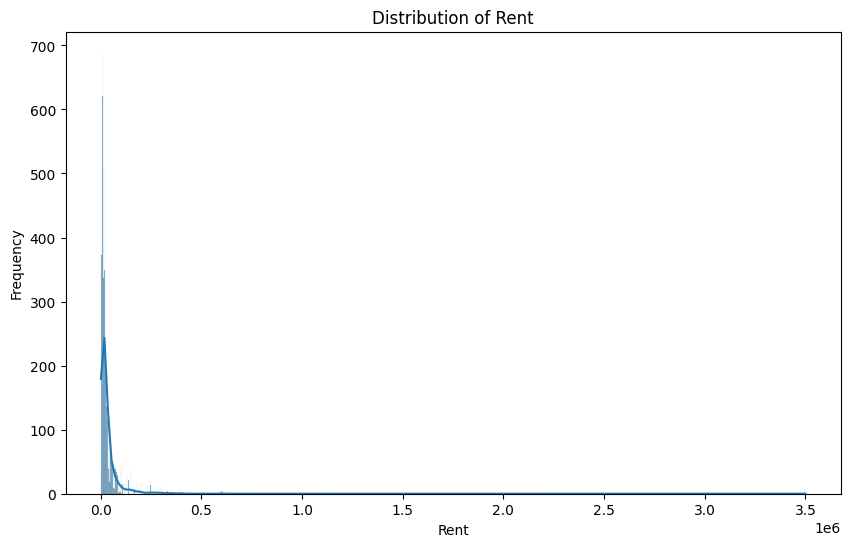

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the distribution of Rent
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Rent'], kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()


# 3. What is the distribution of the size of the house?

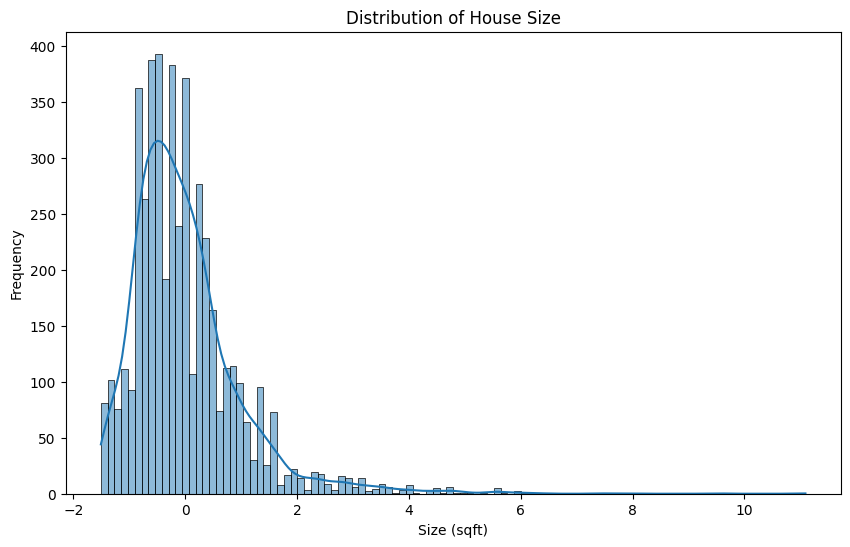

In [9]:
# Plotting the distribution of Size
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Size'], kde=True)
plt.title('Distribution of House Size')
plt.xlabel('Size (sqft)')
plt.ylabel('Frequency')
plt.show()

# 4.What is the frequency of different Area Types?

In [10]:
# You can use .value_counts() to get the count of each unique value in a categorical column, followed by a bar plot to visualize the distribution.

Area Type
2    2446
1    2298
0       2
Name: count, dtype: int64


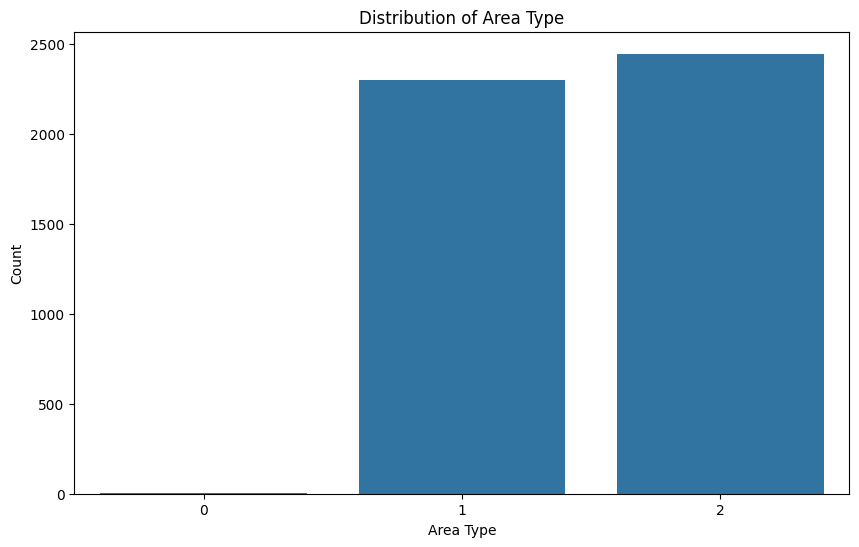

In [11]:
# Frequency of Area Type
print(dataset['Area Type'].value_counts())
# Plotting the distribution of Area Type
plt.figure(figsize=(10, 6))
sns.countplot(x=dataset['Area Type'])
plt.title('Distribution of Area Type')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()


# 5. How does the rent vary with the area type?

In [12]:
# A boxplot is useful to compare the distribution of Rent across different categories of Area Type


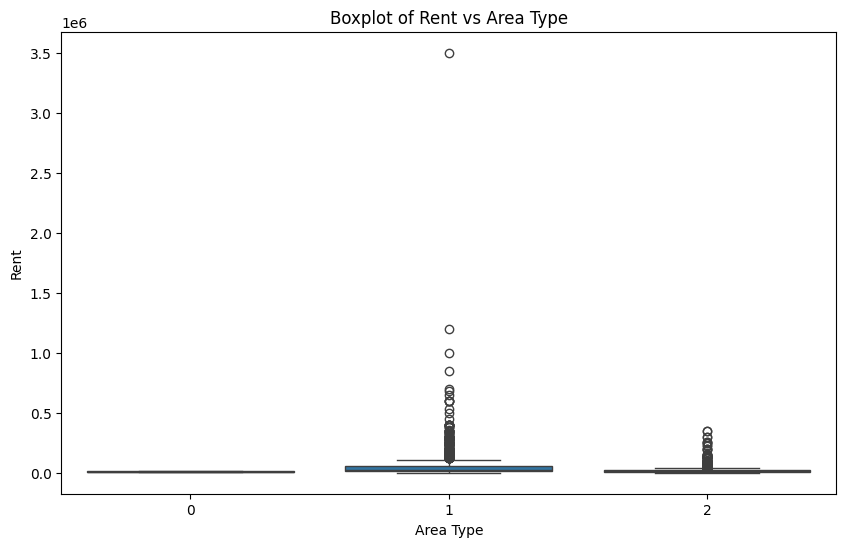

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Area Type'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs Area Type')
plt.xlabel('Area Type')
plt.ylabel('Rent')
plt.show()

# 6. How does rent vary by city?

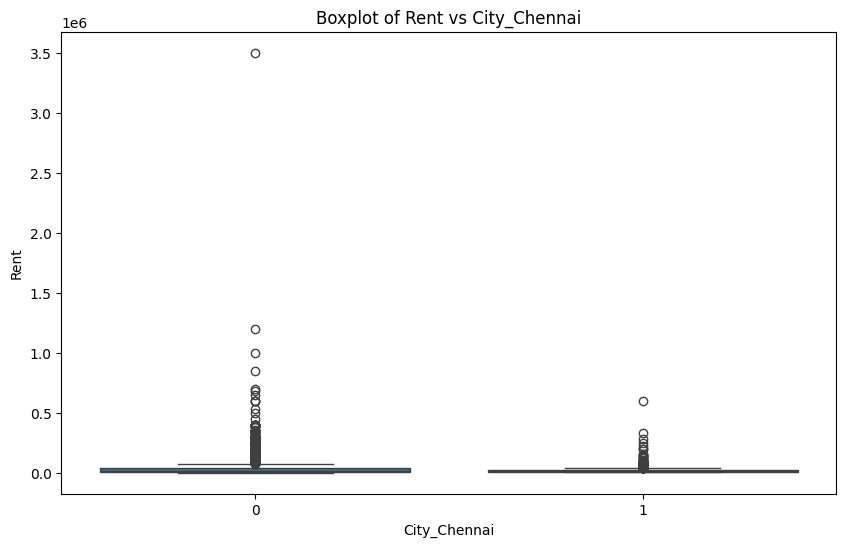

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['City_Chennai'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs City_Chennai')
plt.xlabel('City_Chennai')
plt.ylabel('Rent')
plt.show()


In [20]:
# rent vs City_Delhi

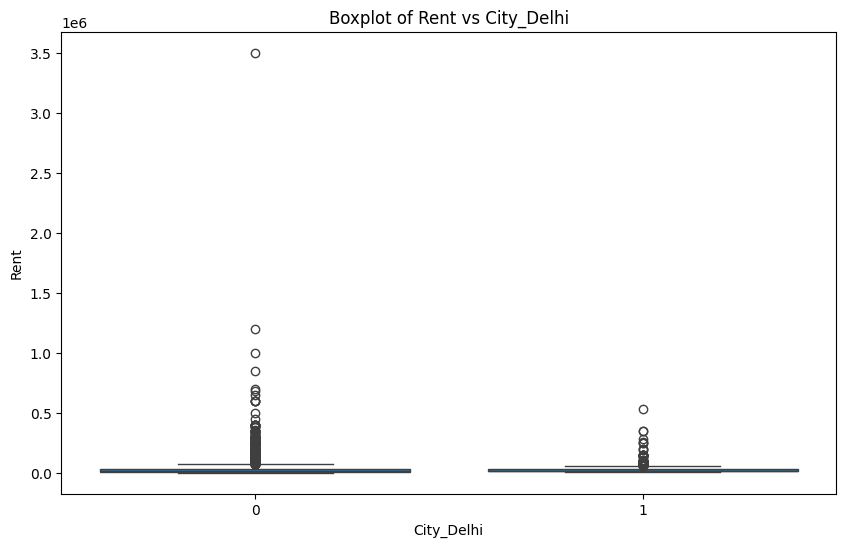

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['City_Delhi'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs City_Delhi')
plt.xlabel('City_Delhi')
plt.ylabel('Rent')
plt.show()


In [ ]:
# rent vs City_Hyderabad	

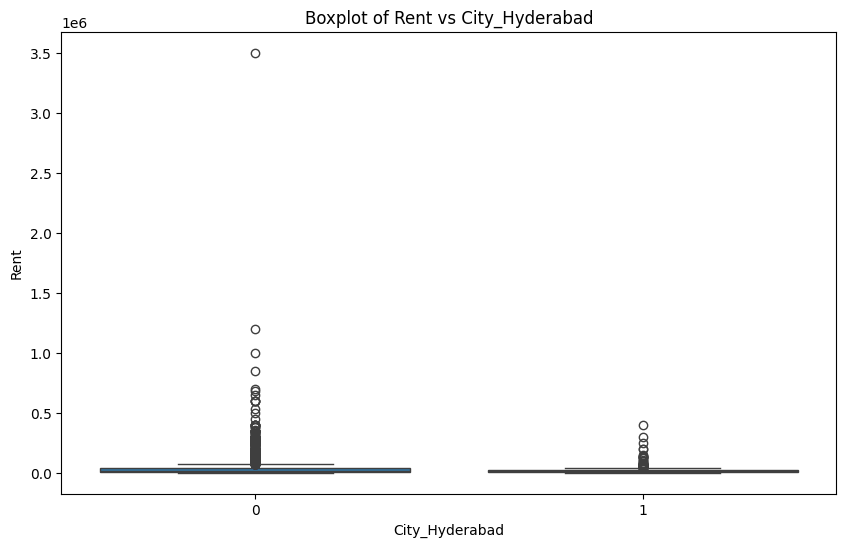

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['City_Hyderabad'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs City_Hyderabad')
plt.xlabel('City_Hyderabad')
plt.ylabel('Rent')
plt.show()


In [28]:
# rent vs City_Kolkata

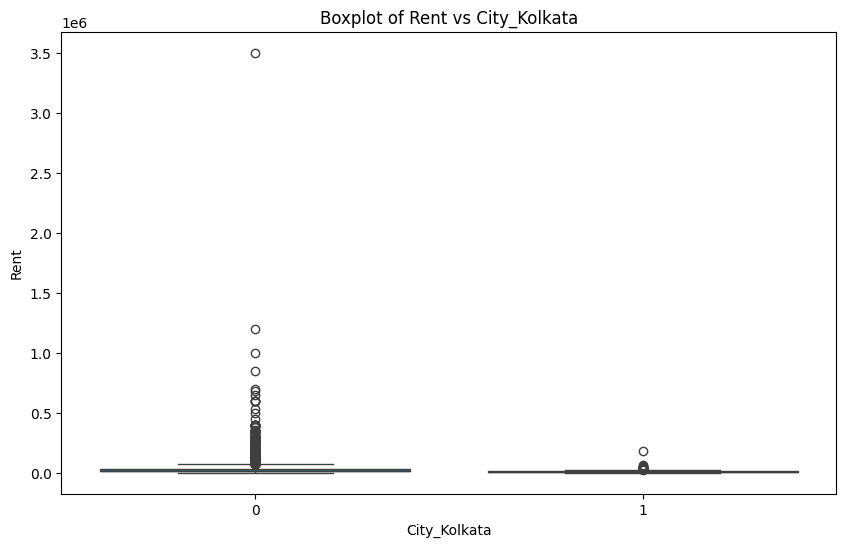

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['City_Kolkata'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs City_Kolkata')
plt.xlabel('City_Kolkata')
plt.ylabel('Rent')
plt.show()


In [30]:
# rent vs City_Mumbai

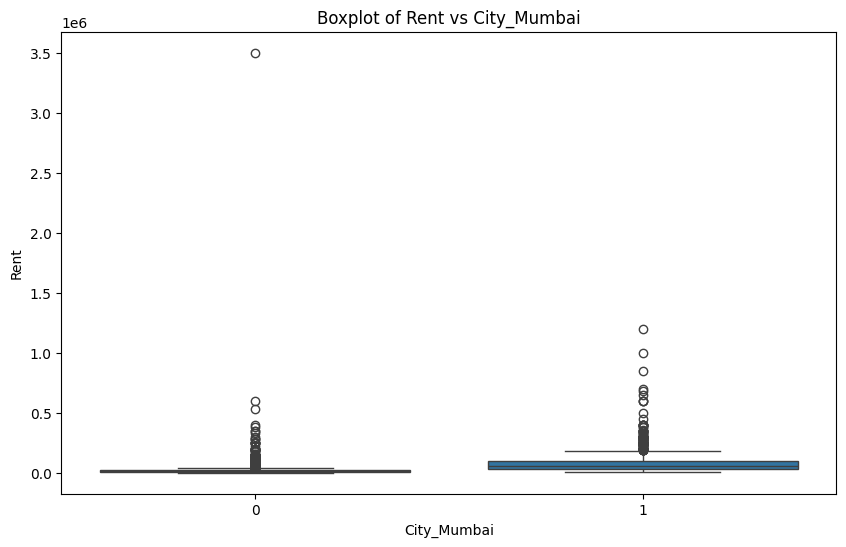

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['City_Mumbai'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs City_Mumbai')
plt.xlabel('City_Mumbai')
plt.ylabel('Rent')
plt.show()

# 7. What is the correlation between Rent and Size?

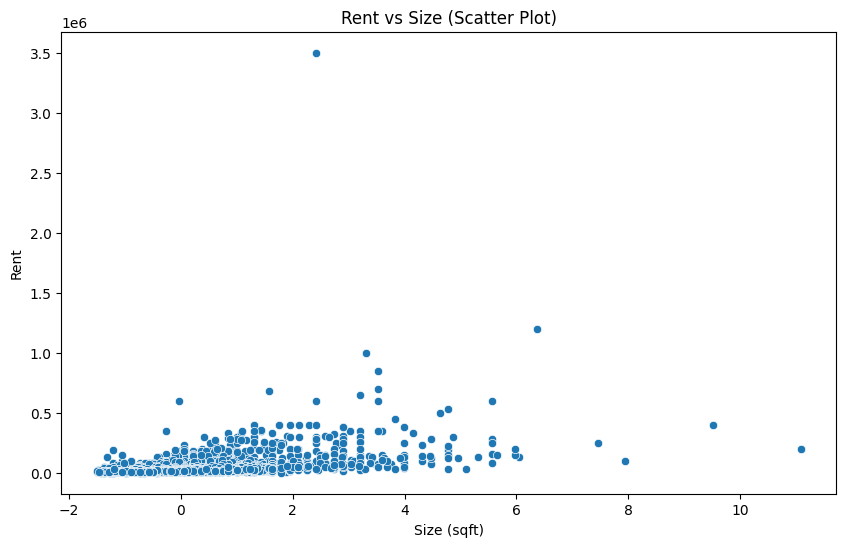

Correlation between Rent and Size: 0.41355075822451937


In [33]:
#Scatter plot of Rent vs Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['Size'], y=dataset['Rent'])
plt.title('Rent vs Size (Scatter Plot)')
plt.xlabel('Size (sqft)')
plt.ylabel('Rent')
plt.show()

#Correlation coefficient
correlation = dataset[['Rent', 'Size']].corr()
print(f"Correlation between Rent and Size: {correlation.iloc[0, 1]}")

# 8.How does Rent change with Furnishing Status?

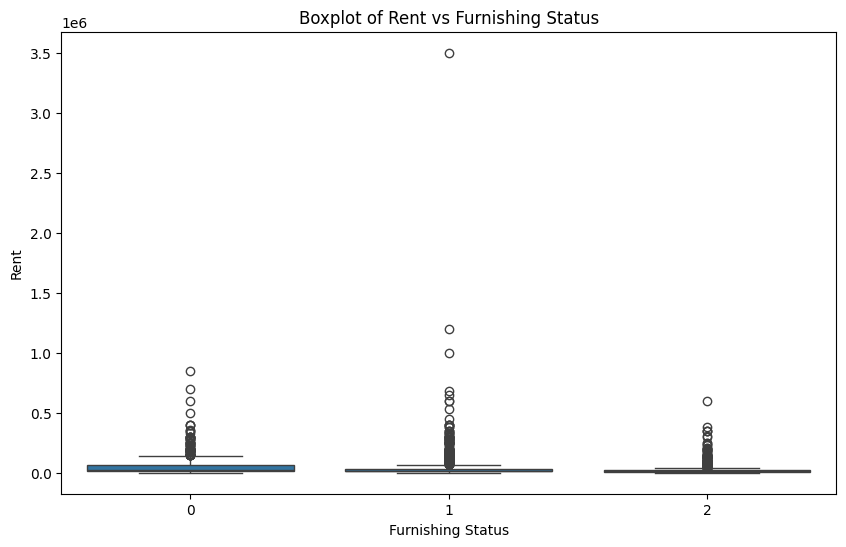

In [34]:
# Boxplot of Rent vs Furnishing Status
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Furnishing Status'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Rent')
plt.show()

# 9. Are there any outliers in the Rent column?

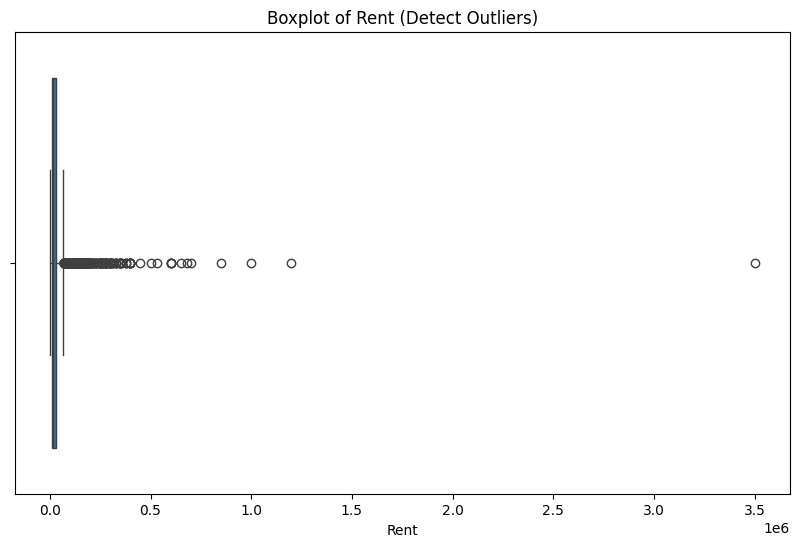

In [35]:
# Boxplot for Rent to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Rent'])
plt.title('Boxplot of Rent (Detect Outliers)')
plt.xlabel('Rent')
plt.show()

In [36]:
# 10. What is the relationship between Bathroom and Rent?

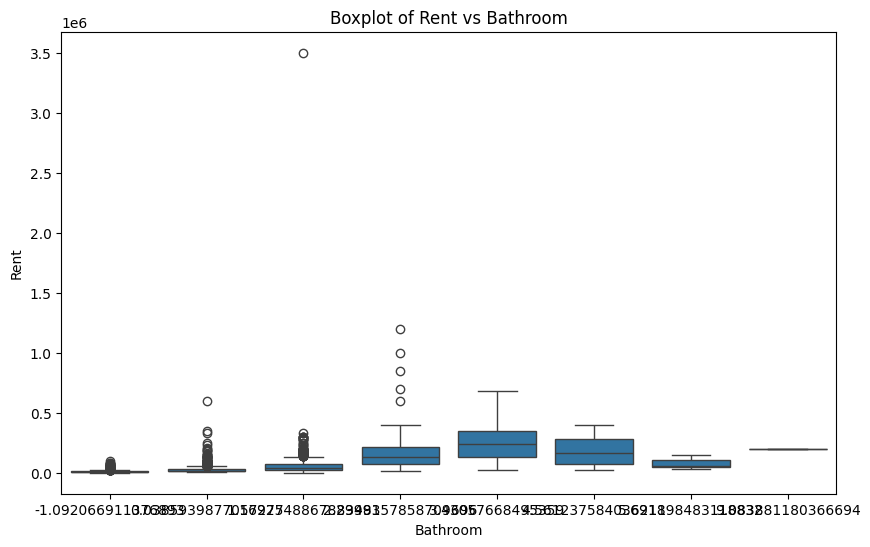

In [39]:
# Boxplot of Rent vs Bathroom
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Bathroom'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Rent')
plt.show()


# 11.What is the relationship between Tenant Preferred and Rent?

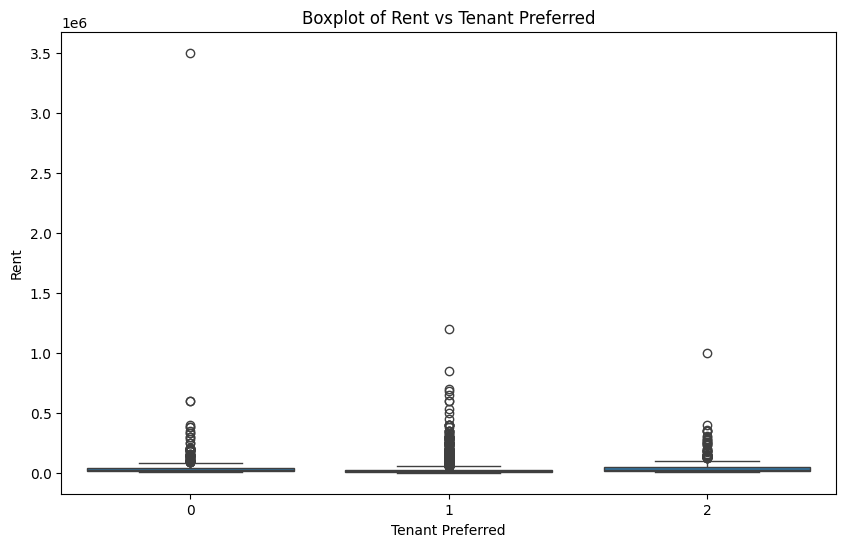

In [40]:
# Boxplot of Rent vs Tenant Preferred
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Tenant Preferred'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs Tenant Preferred')
plt.xlabel('Tenant Preferred')
plt.ylabel('Rent')
plt.show()


# 12. What is the correlation matrix for all numerical features?

In [41]:
# use a heatmap to visualize the correlation between multiple numerical variables.


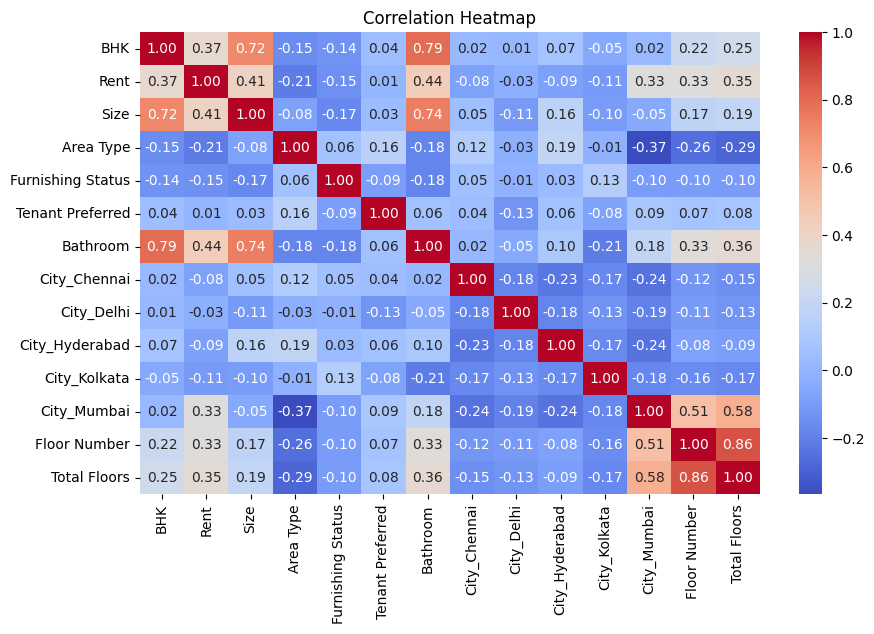

In [42]:
# Correlation matrix
correlation_matrix = dataset.corr()
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 13.What are the unique values in the Floor column?

In [45]:
# Check unique values in the 'Floor' column
print(dataset['Total Floors'].unique())


[-5.24849349e-01 -4.19211732e-01 -6.30486966e-01 -3.13574115e-01
 -2.07936498e-01  7.42802056e-01  1.08976353e-01 -1.02298881e-01
  1.27099014e+00  3.20251588e-01  3.33873632e-03  6.37164439e-01
  7.50360955e+00  1.16535252e+00  5.31526822e-01  1.79917823e+00
  2.53864155e+00  1.48226538e+00  1.69354061e+00  1.37662776e+00
  2.14613971e-01  1.58790299e+00  5.39085721e+00  9.54077290e-01
  6.23595815e+00  4.33448104e+00  3.48938010e+00  3.91193057e+00
  3.70065533e+00  3.59501772e+00  5.60213244e+00  2.64427916e+00
  2.43300393e+00  2.32736631e+00  8.66562334e+00  8.48439673e-01
  4.25889205e-01  2.22172870e+00  1.05971491e+00  4.01756819e+00
  2.96119202e+00  7.18669670e+00  3.27810487e+00  4.65139389e+00
  3.80629295e+00  1.90481584e+00  2.11609108e+00  2.01045346e+00
  7.29233432e+00  3.06682963e+00  3.17246725e+00  5.07394436e+00
  6.44723338e+00  7.39797193e+00  4.54575627e+00  5.49649483e+00
  5.81340768e+00  3.38374248e+00  4.75703151e+00  4.96830674e+00
  2.74991678e+00  4.12320

# 14.How does rent vary by Floor type?

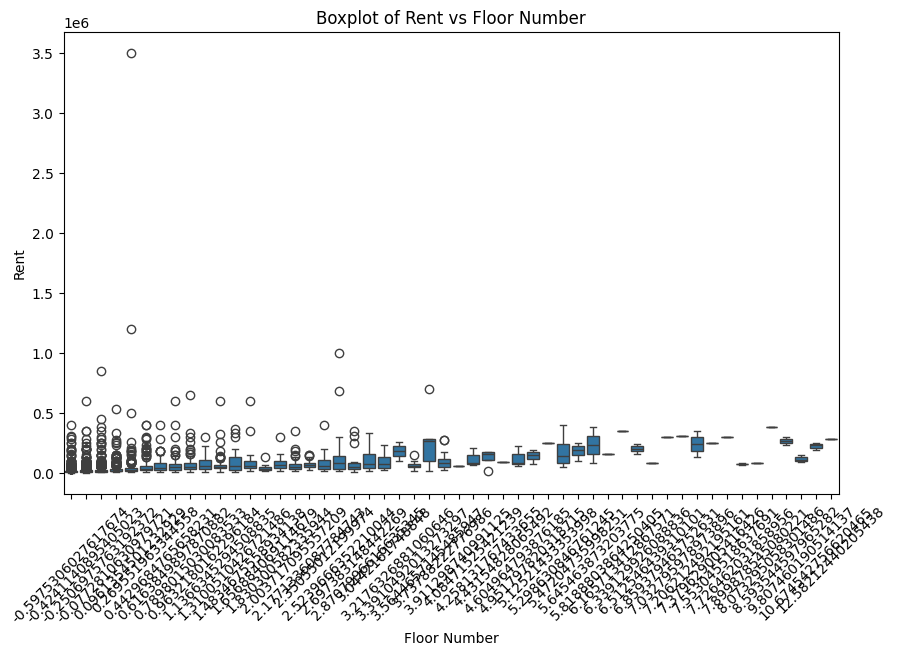

In [51]:
# Boxplot of Rent vs Floor
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Floor Number'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs Floor Number')
plt.xlabel('Floor Number')
plt.ylabel('Rent')
plt.xticks(rotation=45)
plt.show()


# 15.How many properties are listed for each floor?

Floor Number
-0.424114     1161
-0.597531      961
-0.250698      945
-0.077281      512
 0.096135      272
 0.269552      164
 0.442968       93
 0.616385       74
 1.136635       67
 0.789802       66
 0.963218       65
 1.483468       47
 1.310051       43
 2.003717       41
 1.830301       34
 2.523967       26
 2.350550       22
 2.177134       21
 2.697383       16
 1.656884       15
 2.870800       12
 3.737882       12
 3.391049        9
 3.564466        6
 3.044216        6
 4.604965        5
 5.298631        4
 4.258132        4
 5.472047        3
 9.807460        3
 10.674543       3
 4.084715        3
 4.951798        3
 3.217633        3
 3.911299        3
 8.593545        2
 7.206212        2
 7.726462        2
 5.645464        2
 6.339130        2
 6.859379        1
 5.818880        1
 6.165713        1
 7.553046        1
 6.512546        1
 7.379629        1
 5.125214        1
 7.032796        1
 8.073295        1
 4.431548        1
 7.899879        1
 12.582124       1

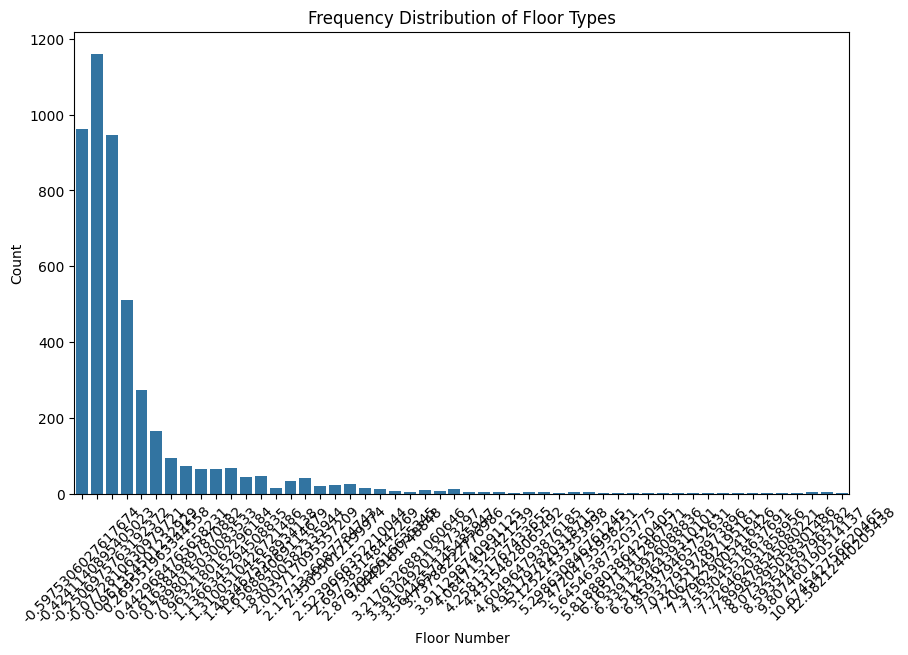

In [54]:
# Count the number of occurrences for each floor type
print(dataset['Floor Number'].value_counts())
# Plot the frequency distribution of floor types
plt.figure(figsize=(10, 6))
sns.countplot(x=dataset['Floor Number'])
plt.title('Frequency Distribution of Floor Types')
plt.xlabel('Floor Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 16.Is there any rent variation across different floor numbers?

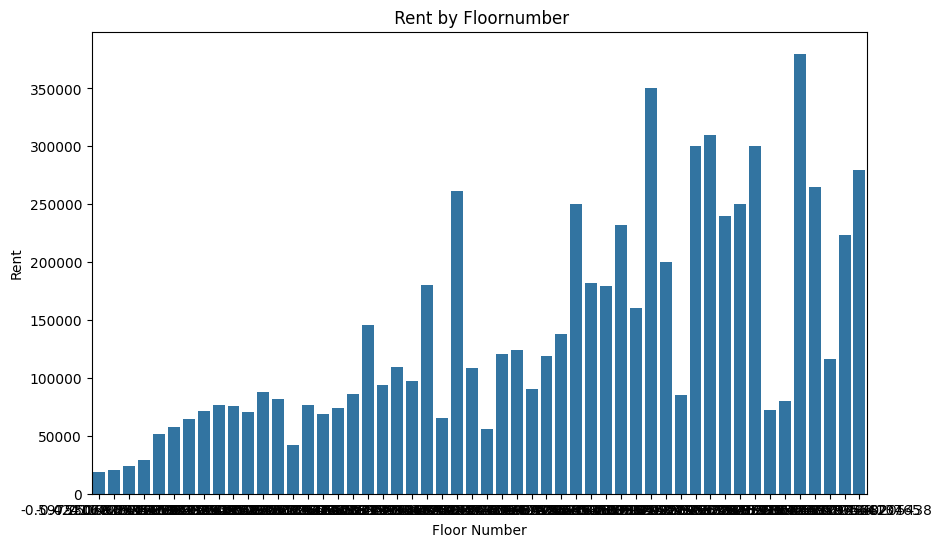

In [58]:
 # Group by Floor and calculate the mean rent for each floor
mean_rent_by_floor = dataset.groupby('Floor Number')['Rent'].mean()
#Plot the mean rent by floor type
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_rent_by_floor.index, y=mean_rent_by_floor.values)
plt.title(' Rent by Floornumber')
plt.xlabel('Floor Number')
plt.ylabel('Rent')
plt.show()